In [9]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/fatemehmehrparvar/lung-disease'

od.download(dataset_url)

Skipping, found downloaded files in ".\lung-disease" (use force=True to force download)


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

In [12]:
dataset_path = r"C:\Ai project\lung_disease_project"

image_size = (224, 224)
batch_size = 32
seed = 123

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

print("Class Labels:", train_ds.class_names)


Found 3475 files belonging to 1 classes.
Using 2780 files for training.
Found 3475 files belonging to 1 classes.
Using 695 files for validation.
Class Labels: ['lung-disease']


In [13]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y)).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y)).prefetch(buffer_size=AUTOTUNE)

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_ds.cardinality().numpy(), activation='softmax')  # automatic class count
])

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,validation_data=val_ds,epochs=5)

Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 305s 3s/step - accuracy: 0.9344 - loss: 0.3674 - val_accuracy: 1.0000 - val_loss: 3.4305e-09
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 1.0000 - loss: 4.8102e-06 - val_accuracy: 1.0000 - val_loss: 5.1457e-10
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 1.0000 - loss: 2.2845e-06 - val_accuracy: 1.0000 - val_loss: 1.7152e-10
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 1.0000 - loss: 3.7157e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 1.0000 - loss: 3.2602e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [16]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy:.2f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 1.00


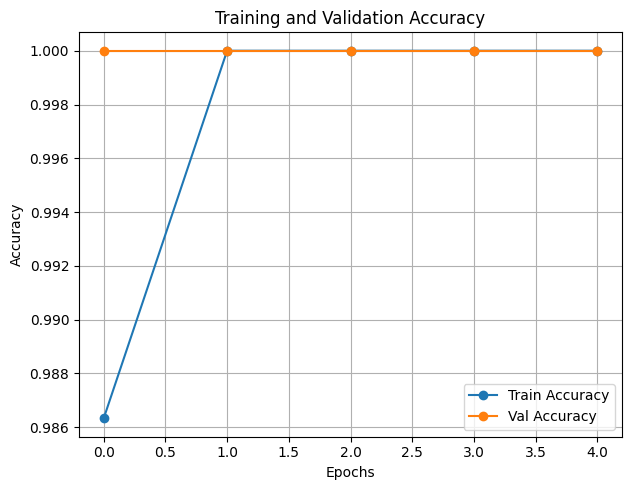

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

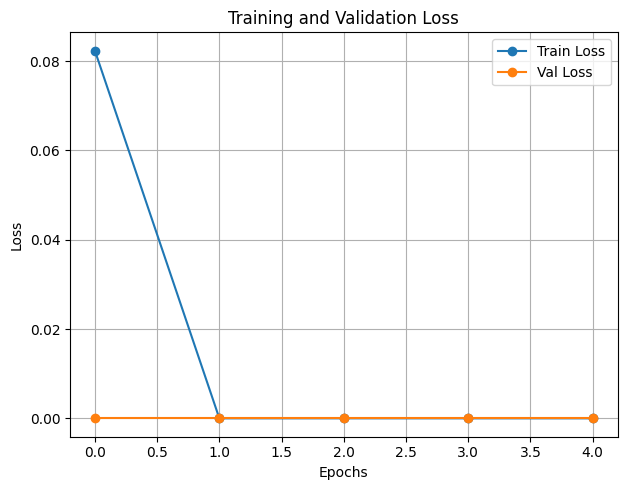

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
model.save("model.h5")